In [2]:
import json
from os import path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from tbd_eeg.data_analysis.eegutils import EEGexp

datastore = 'datastore/allen_mouse_eeg' # path to the allen_mouse_eeg folder relative to your current directory

%matplotlib widget

# Importing an experiment in the EEGexp object

In [10]:
# list all mice
from glob import glob

print('Available experiments:')
print([path.basename(f) for f in glob(path.join(datastore, '*'))])

Available experiments:
['mouse551400', 'mouse586466', 'loading_data.ipynb', 'mouse521885', 'mouse521886', 'mouse521887', 'mouse526065', 'mouse538931', 'mouse542447', 'mouse543393', 'mouse543394', 'mouse543395', 'mouse543396', 'mouse546655', 'mouse546656', 'mouse546657', 'mouse546658', 'mouse547867', 'mouse547868', 'mouse551397', 'mouse551398', 'mouse551399', 'mouse569062', 'mouse569064', 'mouse569068', 'mouse569069', 'mouse569070', 'mouse569072', 'mouse569073', 'mouse571618', 'mouse571619', 'mouse571620', 'mouse575100', 'mouse575101', 'mouse575102', 'mouse575103', 'mouse577578', 'mouse582385', 'mouse582386', 'mouse582387', 'mouse582388', 'mouse586467', 'mouse586468', 'mouse586469', 'mouse590478', 'mouse590479', 'mouse590480', 'mouse590481', 'mouse599017', 'mouse599974', 'mouse599975', 'mouse618552', 'mouse621102', 'mouse627041', 'mouse633552', 'mouse635397', 'mouse635890', 'mouse638703', 'test_NP4', 'test_opto_saline', 'zapnzip-8cc7481f10dc.json']


In [14]:
mouse = 'mouse599975' #'mouse590481' #mouse586468' #'mouse599975'

print('Available sessions:')
print([path.basename(f) for f in glob(path.join(datastore, mouse, '*'))])

Available sessions:
['estim_vis_2022-03-31_12-03-06', 'histology', 'signal_test_2022-02-08_13-19-49', 'urethane_vis_2022-04-01_10-58-41']


In [15]:
expt = 'estim_vis_2022-03-31_12-03-06'#'estim_vis_2022-03-31_12-03-06'
#probe = 'probeC'

rec_folder = f'datastore/allen_mouse_eeg/{mouse}/{expt}/experiment1/recording1'
exp = EEGexp(rec_folder, preprocess=False, make_stim_csv=False)

Experiment type: sensory stimulation
SomnoSuite log file not found.
Body camera file not found.
Pupil camera file not found.


In [16]:
rec_folder

'datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/recording1'

In [17]:
exp.ephys_params

{'probeB': {'probe_info': 'datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/probeB_sorted/probe_info.json',
  'num_chs': 384,
  'bit_volts': 0.195,
  'ap_continuous': 'datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/probeB_sorted/continuous/Neuropix-PXI-100.0/continuous.dat',
  'ap_timestamps': 'datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/probeB_sorted/continuous/Neuropix-PXI-100.0/timestamps_master_clock.npy',
  'ap_sample_rate': 30000,
  'lfp_continuous': 'datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/probeB_sorted/continuous/Neuropix-PXI-100.1/continuous.dat',
  'lfp_timestamps': 'datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/probeB_sorted/continuous/Neuropix-PXI-100.1/timestamps_master_clock.npy',
  'lfp_sample_rate': 500,
  'spike_clusters': 'datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experim

In [18]:
# since we record multiple data (EEG, Neuropixels etc.), metadata for all of them can be found using the ephys_params property
print('Sources of data:', exp.ephys_params.keys())
print(exp.ephys_params)
print('\nMetadata for the EEG recordings:')
print(exp.ephys_params['EEG'])
print('\nMetadata for spike recordings:')
print(exp.ephys_params['probeC'])

Sources of data: dict_keys(['probeB', 'EEG', 'probeC', 'probeF'])
{'probeB': {'probe_info': 'datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/probeB_sorted/probe_info.json', 'num_chs': 384, 'bit_volts': 0.195, 'ap_continuous': 'datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/probeB_sorted/continuous/Neuropix-PXI-100.0/continuous.dat', 'ap_timestamps': 'datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/probeB_sorted/continuous/Neuropix-PXI-100.0/timestamps_master_clock.npy', 'ap_sample_rate': 30000, 'lfp_continuous': 'datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/probeB_sorted/continuous/Neuropix-PXI-100.1/continuous.dat', 'lfp_timestamps': 'datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/probeB_sorted/continuous/Neuropix-PXI-100.1/timestamps_master_clock.npy', 'lfp_sample_rate': 500, 'spike_clusters': 'datastore/allen_mouse_eeg/m

## Loading EEG data

In [9]:
# loading the EEG data
eegdata = exp.load_eegdata(return_type='pd', downsamplefactor=5)
eegdata.head()

KeyboardInterrupt: 

In [19]:
exp.stimulus_log_file

'datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/recording1/sensory_stim_log.csv'

In [20]:
# loading the stimulus table
stim_log = pd.read_csv('datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/recording1/all_stim_log.csv')#'datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/recording1/all_stim_log.csv')#exp.stimulus_log_file)
stim_log

,stim_type,parameter,onset,offset,duration,sweep
0,biphasic,30,313.17998,313.18038,0.00040,0
1,biphasic,30,317.04933,317.04973,0.00040,0
2,biphasic,50,321.01047,321.01087,0.00040,0
3,biphasic,70,325.49254,325.49294,0.00040,0
4,biphasic,70,329.14937,329.14977,0.00040,0
...,...,...,...,...,...,...
955,circle,white,5260.03320,5260.28254,0.24934,1
956,circle,white,5264.48693,5264.73626,0.24933,1
957,circle,white,5268.64042,5268.90643,0.26601,1
958,circle,white,5273.11081,5273.36016,0.24935,1


In [21]:
#get timestamps for a particular sweep and a particular parameter

set(stim_log['sweep']), set(stim_log['parameter'])

df_0_30 = stim_log[stim_log['parameter']=="50"][stim_log['sweep']==0]
df_0_30.reset_index(inplace=True)

time_stamps = []
for i in range(len(df_0_30)-1):
    start = df_0_30.loc[i]['offset']+0.005
    end = df_0_30.iloc[i+1]['onset']-0.005
    time_stamps.append((start, end))

({0, 1}, {'30', '50', '70', 'white'})

In [54]:
np.save("timestamps_sweep2_param70_mouse590481.npy", time_stamps)

## Loading spikes data

### Get a list of NPX probes in this experiment

In [28]:
probe_list = [x.replace('_sorted', '') for x in exp.experiment_data if 'probe' in x]
print(probe_list)

['probeB', 'probeC', 'probeF']


The probe names come from where on the rig the probe is mounted, not specific to a brain area. In the more recent experiments the following are likely locations:<br>
- probeF: motor cortex, anterior cingulate
- probeB: somatosensory cortex, thalamus (motor-related)
- probeC (or D): visual cortex, thalamus (visual or motor related)

Having a list of the probe names ('probeB') is helpful for accessing parameters that are stored in the EEGexp class, like below:

In [29]:
exp.ephys_params['probeB'].keys()

dict_keys(['probe_info', 'num_chs', 'bit_volts', 'ap_continuous', 'ap_timestamps', 'ap_sample_rate', 'lfp_continuous', 'lfp_timestamps', 'lfp_sample_rate', 'spike_clusters', 'spike_times', 'cluster_group', 'cluster_metrics', 'waveforms'])

In [30]:
exp.ephys_params['probeB']

{'probe_info': 'datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/probeB_sorted/probe_info.json',
 'num_chs': 384,
 'bit_volts': 0.195,
 'ap_continuous': 'datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/probeB_sorted/continuous/Neuropix-PXI-100.0/continuous.dat',
 'ap_timestamps': 'datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/probeB_sorted/continuous/Neuropix-PXI-100.0/timestamps_master_clock.npy',
 'ap_sample_rate': 30000,
 'lfp_continuous': 'datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/probeB_sorted/continuous/Neuropix-PXI-100.1/continuous.dat',
 'lfp_timestamps': 'datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/probeB_sorted/continuous/Neuropix-PXI-100.1/timestamps_master_clock.npy',
 'lfp_sample_rate': 500,
 'spike_clusters': 'datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/probeB_sorted/c

In the above dictionary we find all the useful data.  
The 'ap' band is the band on which very high frequencies are recorded. Spikes get recorded on this band.  
`ap_continuous` is the raw analog data from this band. The corresponding timestamps for the recorded analog values are in `ap_timestamps`. And the sampling rate for the recording is in `ap_sample_rate`.  
`lfp` is the band on which lower frequency signals are recorded. These are the average potentials arising from the activity of thousands of neurons near the electrode. The next few keys are similar to the `ap` keys, but for `lfp`.  
The raw data from the `ap` channel has to be processed (spike-sorting) to get the actual spikes. The spike times are in the corresponding file; the action potential (ap!) waveforms for each identified neuron is in the `waveforms` file. And the `cluster_groups` are data related to the spike-sorting.  
  
Lakshika will basically need the spike times array for her preliminary analysis.

In [31]:
probe = 'probeB'
_spike_times = np.load(
    exp.ephys_params[probe]['spike_times'], mmap_mode='r'
)
_spike_clusters = np.load(
    exp.ephys_params[probe]['spike_clusters'], mmap_mode='r'
)
cluster_metrics = pd.read_csv(
    exp.ephys_params[probe]['cluster_metrics'], index_col=1
).drop('Unnamed: 0', axis=1, errors='ignore')
cluster_groups = pd.read_csv(
    exp.ephys_params[probe]['cluster_group'],
    sep='\t', index_col=0
)

# rearrange into spike times for each cluster
spike_df = pd.DataFrame(
    index=_spike_clusters, data=_spike_times, columns=['time']
)
spike_times = spike_df.groupby(level=0).apply(lambda g: g.values[:, 0])

In [32]:
#remove unwanted regions 
set(cluster_metrics['area'])

{'CA1',
 'CA2',
 'CA3',
 'LD',
 'SSp-ll6a',
 'SSp-ll6b',
 'SSp-tr2/3',
 'SSp-tr4',
 'SSp-tr5',
 'SSp-tr6a',
 'VAL',
 'alv',
 'ccb',
 'cing',
 'fi',
 'root',
 'scwm'}

In [33]:
cluster_metrics.shape

(887, 28)

In [34]:
final_metrix = cluster_metrics[(cluster_metrics['area'] != 'alv') & (cluster_metrics['area'] != 'em') & (cluster_metrics['area'] != 'fiber_tracts') & (cluster_metrics['area'] != 'fp') & (cluster_metrics['area'] != 'nan') & (cluster_metrics['area'] != 'or')]

In [37]:
final_metrix.reset_index(inplace=True)

In [42]:
#combine the areas/channels of the neurons across all the three probes in an alphabetical order

probeF_pc = final_metrix['peak_channel']
probeF_a = final_metrix['area']

In [34]:
probeC_pc = final_metrix['peak_channel']
probeC_a = final_metrix['area']

In [25]:
probeB_pc = final_metrix['peak_channel']
probeB_a = final_metrix['area']

In [365]:
probeC = final_metrix['peak_channel']

In [366]:
probeF = final_metrix['peak_channel']

In [47]:
combined = []
combined.extend(probeB_a)
combined.extend(probeC_a)
combined.extend(probeF_a)

In [48]:
combined = np.array(combined)

In [49]:
np.save("mouse586468_final_allprobes_area.npy", combined)

## Count the number of spikes in small time-intervals (5 ms windows) and sum it across all the 120 sampling points followed by taking the average

In [ ]:
np.load("mouse599975_final_allprobes_area.npy")

array(['VAL', 'VAL', 'VAL', ..., 'MOs2/3', 'LSr', 'cing'], dtype='<U32')

In [38]:
final_spikedata = spike_times[final_metrix['cluster_id']]

In [39]:
final_spikedata.reset_index(drop=True, inplace=True)

In [40]:
final_spikedata

0      [12.557459605690383, 12.583659563385481, 12.61...
1      [12.637826142588892, 12.73339265494451, 12.877...
2      [12.599259538195838, 12.666226096731407, 12.67...
3      [12.635626146141476, 12.694226051519763, 12.75...
4      [12.558126271280344, 12.60969285468309, 12.649...
                             ...                        
870    [12.698392711458837, 12.930725669643834, 16.59...
871    [23.899207958804254, 27.633968594941507, 79.07...
872    [19.203382207833783, 19.635681509798815, 21.48...
873    [755.2472541518086, 838.3108957534079, 967.871...
874    [734.4003009498697, 754.9866876534379, 764.301...
Length: 875, dtype: object

In [45]:
timeslots = np.load("mouse_599975/timestamps_sweep0_param50.npy")

In [46]:
min([timeslots[i][1]-timeslots[i][0] for i in range(len(timeslots))])

3.509599999999864

In [47]:
data = []

In [49]:
bins = np.arange(timeslots[0][0]+0.004, timeslots[0][0]+3.4+0.004, 0.005)

In [51]:
for i in range(len(timeslots)):
    bins = np.arange(timeslots[i][0]+0.004, timeslots[i][0]+3.4+0.004, 0.005)[:680]
    #print(bins.shape)
    data_= []
    for j in range(len(final_spikedata)):
        counts, bins_ = np.histogram(final_spikedata[j], bins)
        data_.append(counts)
    data.append(np.array(data_))
    #ata = np.stack((data, data_), axis=1)

In [52]:
len(data)

119

In [53]:
np.array(data[0]).shape

(875, 679)

In [54]:
data[2].shape, data[50].shape

((875, 679), (875, 679))

In [55]:
stacked_data = np.stack(data, axis=1)

In [57]:
stacked_data = stacked_data.sum(axis=1)

### Apply gaussian to the samples spiking data

In [59]:
def fwhm2sigma(fwhm):
    return fwhm / np.sqrt(8 * np.log(2))

fwhm = 25
sigma = fwhm2sigma(fwhm)

gaussian = np.zeros(stacked_data.shape)
gaussian_positions = np.arange(0, 3.4, 0.005)[:679]

In [60]:
gaussian.shape

(875, 679)

In [78]:
3.4/0.005

680.0

In [61]:
for i in range(gaussian.shape[0]):
    ind = 0
    neuron = stacked_data[i]
    #print(neuron.shape)
    gaussian_positions = np.arange(0, 3.4, 0.005)[:679]
    for j in gaussian_positions:
        #gk = np.exp(-(gaussian_positions*1000-j*1000)**2/(2*sigma**2))
        gk = np.exp(-(gaussian_positions*1000-j*1000)**2/(2*sigma**2))
        gk /= sum(gk)
        #print(gk)
        gaussian[i, ind] = sum(neuron*gk)
       # rint(sum(neuron*gk))
        ind += 1

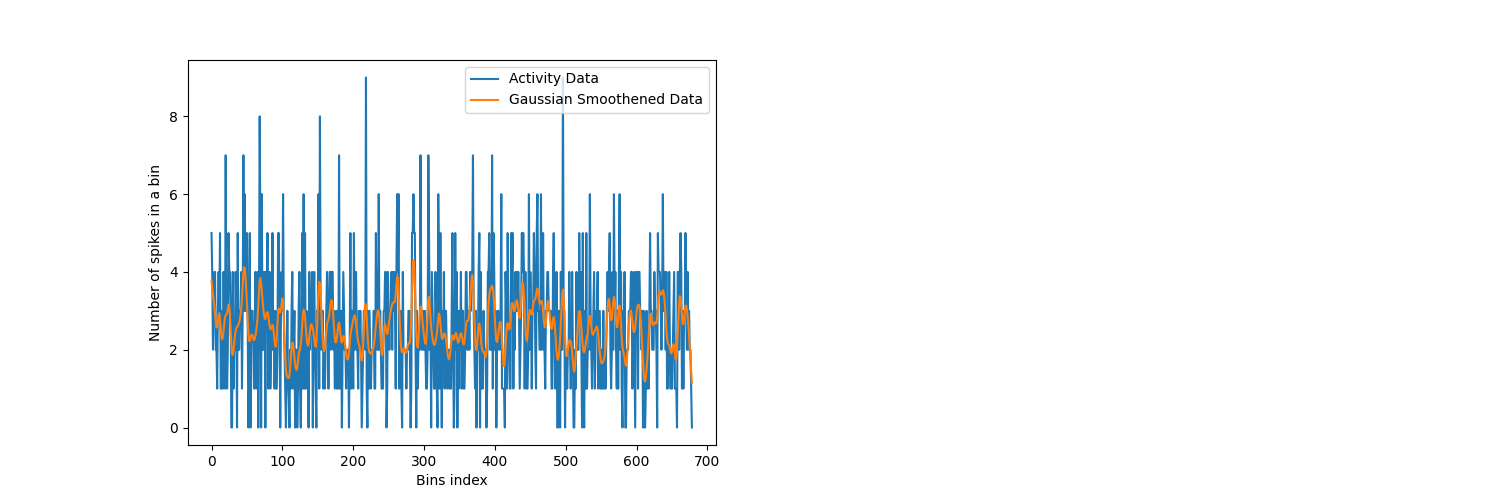

In [79]:
plt.clf()
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(stacked_data[350])
#plt.title("Activity Data")

#plt.subplot(1, 2, 2)
plt.plot(gaussian[350])
plt.legend(["Activity Data", "Gaussian Smoothened Data"])
#plt.title("Gaussian Smoothened Data")

plt.xlabel("Bins index")
plt.ylabel("Number of spikes in a bin")
#plt.title("Binned Spiking Data")

plt.show()

In [63]:
gaussian.shape

(875, 679)

In [1158]:
np.save("mouse_586468/mouse586468_probeF_sweep3_param45.npy", gaussian) #_onset-100toonset+3500

## combine data of a particular sweep and parameter across all the probes

In [1238]:
probeb_0 = np.load("mouse_586468/mouse586468_probeB_sweep3_param45.npy")
probec_0 = np.load("mouse_586468/mouse586468_probeC_sweep3_param45.npy")
probef_0 = np.load("mouse_586468/mouse586468_probeF_sweep3_param45.npy")

In [1239]:
all_p = np.concatenate((probeb_0, probec_0, probef_0))

In [1240]:
all_p.shape

(2129, 679)

In [1241]:
probeb_0.shape, probec_0.shape, probef_0.shape, 

((850, 679), (362, 679), (917, 679))

In [1242]:
850+362+917

2129

In [1243]:
np.save("mouse586468_allprobes_sweep3_param45.npy", all_p)

### Now loop through all probes in this experiment and gather info that is useful for analysis

In [20]:
probe_info = {}
for probei in probe_list:
    probe_info[probei] = {}
    
    ### Every probe has a .json file that contains channel location information, etc.
    with open(exp.ephys_params[probei]['probe_info']) as data_file:
        data = json.load(data_file)
    npx_allch = np.array(data['channel']) # this is an array from 0 to 384
    surface_ch = int(data['surface_channel']) # the electrode we said was at the brain surface
    allch_z = np.array(data['vertical_pos']) # vertical position of each electrode (um), relative to the tip (ch 0 is 20 um from tip)
    ref_mask = np.array(data['mask']) # contains a False for Npx reference channels and "bad chs"
    print('{} surface channel: {:d}'.format(probei, surface_ch))
    probe_info[probei]['surface_channel'] = surface_ch

    ## Get an array of "good" chs that are in the brain ##
    probe_info[probei]['brain_chs'] = np.array([x for x in npx_allch if ref_mask[x] and x <= surface_ch])
    
    ## Get the depth of all chs relative to brain surface (in um, positive is deep in brain) ##
    probe_info[probei]['ch_depths'] = allch_z[surface_ch] - allch_z
    
    ## Get saline chs for re-ref ##
    ## Chooses 10 chs in the ACSF, but a few chs above the brain surface ##
    if surface_ch + 25 > 384:
        probe_info[probei]['saline_chs'] = np.arange(383, 373, -1)
    else:
        probe_info[probei]['saline_chs'] = np.arange(surface_ch + 15, surface_ch + 25)
    
    ## If we have completed the preprocessing step to assign CCF locations to the probe ##
    if 'area_ch' in data.keys():
        probe_info[probei]['ch_areas'] = np.array(data['area_ch'])
        probe_info[probei]['ch_CCF_coords'] = np.array(data['ccf_coord_ch']) # a list [AP, DV, ML] of CCF coordinates
        
        ## My attempt to distinguish chs that are in the cortex ##
        ## Uses the CCF to find if the area has 315 in its structure tree, 315 is the CCF id of the "Isocortex"
        ctx_mask = []
        for chi in probe_info[probei]['brain_chs']:
            if probe_info[probei]['ch_areas'][chi] != 'null':
                ctx_mask.append(
                    315 in str_tree.get_structures_by_acronym([probe_info[probei]['ch_areas'][chi]])[0]['structure_id_path'])
            else:
                ctx_mask.append(False)
        probe_info[probei]['ctx_mask'] = np.array(ctx_mask)
    else:
        print('{} does not have area assignments.'.format(probei))

probeB surface channel: 363


NameError: name 'str_tree' is not defined

# Importing experiment metadata from a shared Google sheet

In [10]:
# accessing the Google sheet with experiment metadata in python
# setting up the permissions:
# 1. install gspread (pip install gspread / conda install gspread)
# 2. copy the service_account.json file to '~/.config/gspread/service_account.json'
# 3. run the following:
import gspread
_gc = gspread.service_account() # need a key file to access the account (step 2)
_sh = _gc.open('Zap_Zip-log_exp') # open the spreadsheet
_df = pd.DataFrame(_sh.sheet1.get()) # load the first worksheet
gmetadata = _df.T.set_index(0).T # put it in a nicely formatted dataframe

gmetadata

ModuleNotFoundError: No module named 'gspread'